**Import the necessary libraries and files**

In [ ]:
pip install biopython

     |████████████████████████████████| 2.3MB 5.1MB/s 


In [ ]:
from Bio import SeqIO               # for converting FASTA to dataframes
import pandas as pd
import matplotlib.pyplot as plt     # for plotting pie charts
from textwrap import wrap           # for writting files

In [ ]:
from google.colab import files
netherlands_only = files.upload()

Saving netherlands_only.fasta to netherlands_only.fasta


**Modelling the original FESTA file**

In [ ]:
# province -> city or town (add the necessary province - city/town/village match as needed base on the input file)

# Flevoland = "Zeewolde"
# NoordBrabant = "Andel", "Berlicum", "Eindhoven", "Helmond", "Loon_op_zand", "Nieuwendijk", "Oisterwijk", "Oss", "Tilburg"
# NoordHolland = "Blaricum", "Diemen", "Haarlem", "Naarden"
# Drenthe = "Coevorden", "Dalen"
# ZuidHolland = "Delft", "Hardinxveld_Giessendam", "Nootdorp", "Rotterdam"
# Utrecht = "Houten"

provinces = {1: ['Flevoland', 'Zeewolde'], 2: ['NoordBrabant', 'Andel'], 3: ['NoordBrabant', 'Berlicum'], 4: ['NoordBrabant', 'Eindhoven'], 5: ['NoordBrabant', 'Helmond'], 
             6: ['NoordBrabant', 'Loon_op_zand'], 7: ['NoordBrabant', 'Nieuwendijk'], 8: ['NoordBrabant', 'Oisterwijk'], 9: ['NoordBrabant', 'Oss'], 10: ['NoordBrabant', 'Tilburg'],
             11: ['NoordHolland', 'Blaricum'], 12: ['NoordHolland', 'Diemen'], 13: ['NoordHolland', 'Haarlem'], 14: ['NoordHolland', 'Naarden'], 15: ['Drenthe', 'Coevorden'], 
             16: ['Drenthe', 'Dalen'], 17: ['ZuidHolland', 'Delft'], 18: ['ZuidHolland', 'Hardinxveld_Giessendam'], 19: ['ZuidHolland', 'Nootdorp'], 
             20: ['ZuidHolland', 'Rotterdam'], 21: ['Utrecht', 'Houten']}


In [ ]:
# FASTA to DataFrame conversion
# sequence with > 10% 'N' characters are excluded

region=[]
date=[]
epi=[]
sequence=[]

n_seq = ('netherlands_only.fasta')
for record in SeqIO.parse(n_seq, "fasta"):
    count = 0
    remove = False

    seq = str(record.seq)
    for index in range(len(seq)):
      if count > len(seq) * 0.1:
        remove = True
        break
      
      if seq[index] == 'N':
        count = count + 1

    if (not remove):
      city = str(record.id.split("/")[2]);
    
      for c in provinces:
        if provinces[c][1] in city:
          city = provinces[c][0] + "_" + city

      region.append(city)
      date.append(str(record.id.split("/")[3].split("|")[2]))
      epi.append(str(record.id.split("/")[3].split("|")[1]))
      sequence.append(seq)

data ={'Region':region, 'Date':date, 'EPI': epi, 'Sequence':sequence}
df= pd.DataFrame(data)

**Counts per region**

In [ ]:
# separate each region into their own data frames for sampling
# add other regions present in the input dataset

df_temp = df['Region'].str.contains('Flevoland')
df_Flevoland = df[df_temp]

df_temp = df['Region'].str.contains('Overijssel')
df_Overijssel = df[df_temp]

df_temp = df['Region'].str.contains('Limburg')
df_Limburg = df[df_temp]

df_temp = df['Region'].str.contains('Gelderland')
df_Gelderland = df[df_temp]

df_temp = df['Region'].str.contains('NoordBrabant')
df_NoordBrabant = df[df_temp]

df_temp = df['Region'].str.contains('NoordHolland') 
df_NoordHolland = df[df_temp]

df_temp = df['Region'].str.contains('Drenthe') 
df_Drenthe = df[df_temp]

df_temp = df['Region'].str.contains('ZuidHolland') 
df_ZuidHolland = df[df_temp]

df_temp = df['Region'].str.contains('Utrecht')
df_Utrecht = df[df_temp]

df_temp = df['Region'].str.contains('NA')
df_NA = df[df_temp]

print("Flevoland: ", len(df_Flevoland))
print("Overijssel: ", len(df_Overijssel))
print("Limburg: ", len(df_Limburg))
print("Gelderland: ", len(df_Gelderland))
print("NoordBrabant: ", len(df_NoordBrabant))
print("NoordHolland: ", len(df_NoordHolland))
print("Drenthe: ", len(df_Drenthe))
print("ZuidHolland: ", len(df_ZuidHolland))
print("Utrecht: ", len(df_Utrecht))
print("NA: ", len(df_NA))

Flevoland:  2
Overijssel:  3
Limburg:  6
Gelderland:  4
NoordBrabant:  73
NoordHolland:  7
Drenthe:  2
ZuidHolland:  33
Utrecht:  25
NA:  34


**Percentage of each region in a graph**

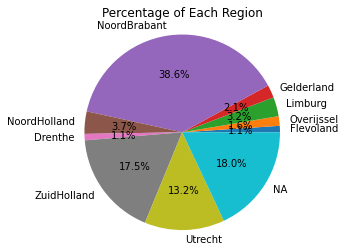

In [ ]:
# visualizing percentage of each region (sampled)

counts = [len(df_Flevoland), len(df_Overijssel), len(df_Limburg), len(df_Gelderland), len(df_NoordBrabant), len(df_NoordHolland), len(df_Drenthe), len(df_ZuidHolland), len(df_Utrecht), len(df_NA)]

prov = 'Flevoland','Overijssel','Limburg', 'Gelderland', 'NoordBrabant', 'NoordHolland', 'Drenthe', 'ZuidHolland', 'Utrecht', 'NA'
plt.pie(counts, labels = prov, autopct='%1.1f%%')
plt.title('Percentage of Each Region')
plt.axis('equal')
plt.show()

**Downsize bigger dataframes using Random Sampling**

In [ ]:
# values for n are computed from https://www.surveymonkey.com/mp/sample-size-calculator/
# 85% confidence level, 25% margin of error
# Downsizing regions that have bigger percentages in the chart above

df_NoordBrabant_sampled = df_NoordBrabant.sample(n = 8)
df_ZuidHolland_sampled = df_ZuidHolland.sample(n = 7)  
df_Utrecht_sampled = df_Utrecht.sample(n = 7)
df_NA_sampled = df_NA.sample(n = 7)

print("NoordBrabant: ", len(df_NoordBrabant), " to ", len(df_NoordBrabant_sampled))
print("ZuidHolland: ", len(df_ZuidHolland), " to ", len(df_ZuidHolland_sampled))
print("Utrecht: ", len(df_Utrecht), " to ", len(df_Utrecht_sampled))
print("NA: ", len(df_NA), " to ", len(df_NA_sampled))

NoordBrabant:  73  to  8
ZuidHolland:  33  to  7
Utrecht:  25  to  7
NA:  34  to  7


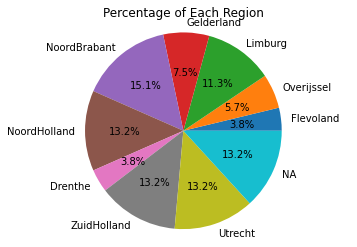

In [ ]:
# visualizing percentage of each region (sampled)

counts = [len(df_Flevoland), len(df_Overijssel), len(df_Limburg), len(df_Gelderland), len(df_NoordBrabant_sampled), len(df_NoordHolland), len(df_Drenthe), len(df_ZuidHolland_sampled), len(df_Utrecht_sampled), len(df_NA_sampled)]

prov = 'Flevoland','Overijssel','Limburg', 'Gelderland', 'NoordBrabant', 'NoordHolland', 'Drenthe', 'ZuidHolland', 'Utrecht', 'NA'
plt.pie(counts, labels = prov, autopct='%1.1f%%')
plt.title('Percentage of Each Region')
plt.axis('equal')
plt.show()

**Writing the FASTA file**

In [ ]:
# Merge all dataframes
    
df_compile = [df_Flevoland, df_Overijssel, df_Limburg, df_Gelderland, df_NoordBrabant_sampled, df_NoordHolland, df_Drenthe, df_ZuidHolland_sampled, df_Utrecht_sampled, df_NA_sampled]
  
df_final = pd.concat(df_compile)
print(len(df_final))

53


In [ ]:
# this is an empty file initially, placeholder for the writing

from google.colab import files
netherlands_sampled = files.upload()

In [ ]:
ofile = open("netherlands_sampled.fasta", "w")

# match header of original FASTA file, append new line per 80 sequence characters
for index, row in df_final.iterrows():
    seq = wrap(row['Sequence'], 80)
    ofile.write(">" + "hCoV-19/Netherlands/" + row['Region'] + "/2020|" + row["EPI"] + "|" + row["Date"] + "\n")

    for s in seq:
      ofile.write(s + "\n")

ofile.close()